# Crop Disease Predictor Model Training

In [1]:
# Importing the Necessary libraries for training model on image data using Keras.

import keras                                                 # high-level API for building and training deep learning models
from keras.preprocessing.image import ImageDataGenerator     # keras.preprocessing.image: provides image preprocessing utilities, 
                                                             # ImageDataGenerator: loading and augmenting image data on-the-fly
from keras.optimizers import Adam                            # keras.optimizers: provides a set of optimization algorithms, 
                                                             # Adam: an optimization algorithm that uses adaptive learning rates
from keras.callbacks import ModelCheckpoint                  # keras.callbacks: provides a set of callback functions, 
                                                             # ModelCheckpoint: a callback that saves the model's weights during training if the validation loss improves

import matplotlib.pyplot as plt                              # matplotlib.pyplot: plotting library for generating visualizations 

In [2]:
# Define the path of Training and Validation Datasets

train_data_path = r"D:\Plant Disease Predictor\Project\Project\train_test_val_data\train"
validation_data_path = r"D:\Plant Disease Predictor\Project\Project\train_test_val_data\val"

In [3]:
# Define a function to plot a set of images i.e. show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [4]:
# Generating Augmented training Images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# Generator that will read pictures found in train_data_path, and indefinitely generate batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 1951 images belonging to 4 classes.


In [5]:
# Mapping each subdirectory in train_data_path to a unique integer label

training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [6]:
# Generating Augmented Validation Images using below parameters
valid_datagen = ImageDataGenerator(rescale=1./255)

# Generator that reads images from a directory and generates batches of validation image data.
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 324 images belonging to 4 classes.


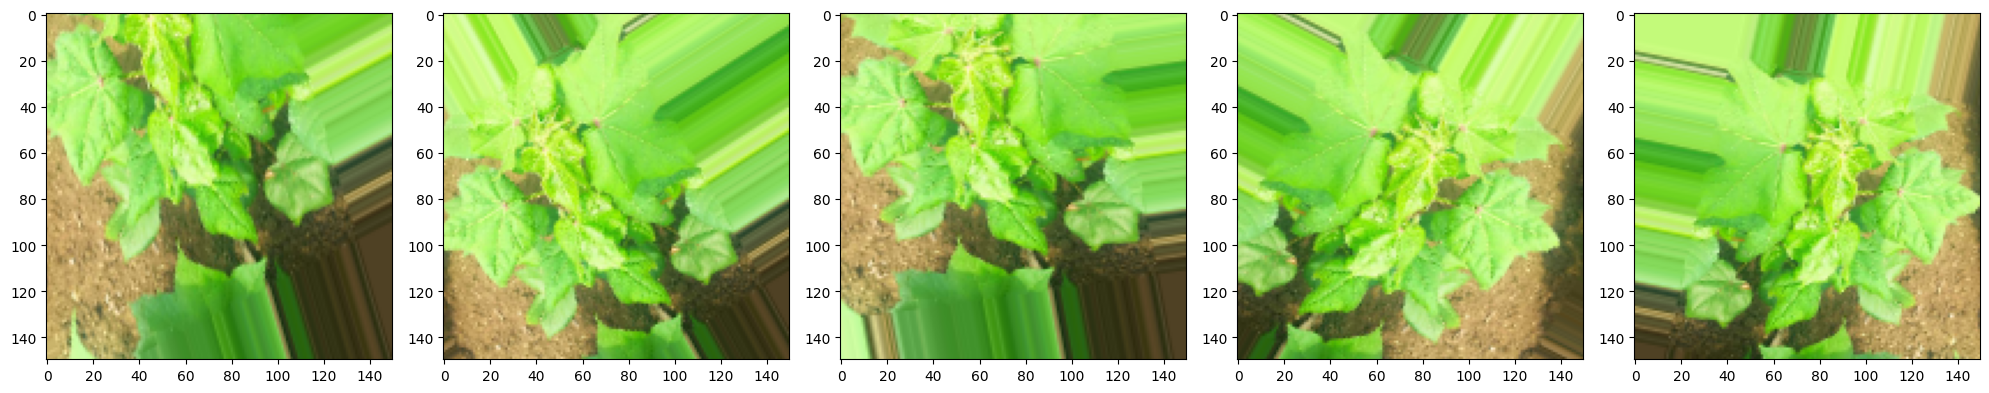

In [7]:
# Genarating 5 augmented images using the training_data and passing this list to the plotImages function to display the images

images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [8]:
# Save best model using val_accuracy metric
model_path = r'D:\Plant Disease Predictor\Project\Project\Trained Model\cotton_plant_disease_pred_model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [9]:
# Building CNN model using the Keras Sequential API

# Conv2D layers apply a set of learnable filters to the input image, resulting in a feature map
# MaxPooling2D layers perform downsampling on the output feature maps
# Dropout layers randomly drop out some of the neurons during training
# Flatten layer flattens the output feature maps of the last convolutional layer into a 1D vector
# Dense layers are fully connected layers that perform classification based on the features extracted by the convolutional layers

cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])


# Configure the learning process of the model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


c:\Users\Aditya\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
# Display summary of the architecture of a CNN model

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [11]:
# Train the cnn_model using the training_data generator and validate it using the valid_data generator for 500 epochs
# callbacks_list is used to save the best model based on validation accuracy

history = cnn_model.fit(training_data, 
                          epochs=500, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) 

Epoch 1/500
61/61 [==============================] - ETA: 0s - loss: 1.2330 - accuracy: 0.4613
Epoch 1: val_accuracy improved from -inf to 0.47840, saving model to D:\Plant Disease Predictor\Project\Project\Trained Model\cotton_plant_disease_pred_model.h5
61/61 [==============================] - 47s 762ms/step - loss: 1.2330 - accuracy: 0.4613 - val_loss: 1.0473 - val_accuracy: 0.4784
Epoch 2/500
61/61 [==============================] - ETA: 0s - loss: 1.0269 - accuracy: 0.5761
Epoch 2: val_accuracy did not improve from 0.47840
61/61 [==============================] - 33s 540ms/step - loss: 1.0269 - accuracy: 0.5761 - val_loss: 1.0837 - val_accuracy: 0.4599
Epoch 3/500
61/61 [==============================] - ETA: 0s - loss: 0.9124 - accuracy: 0.6325
Epoch 3: val_accuracy improved from 0.47840 to 0.61728, saving model to D:\Plant Disease Predictor\Project\Project\Trained Model\cotton_plant_disease_pred_model.h5
61/61 [==============================] - 33s 545ms/step - loss: 0.9124 - ac

In [12]:
# Save the Best trained cnn_model

best_model_path = r'D:\Plant Disease Predictor\Project\Project\Trained Model\Best Model\cotton_plant_disease_pred_best_model.h5'
cnn_model.save(best_model_path)

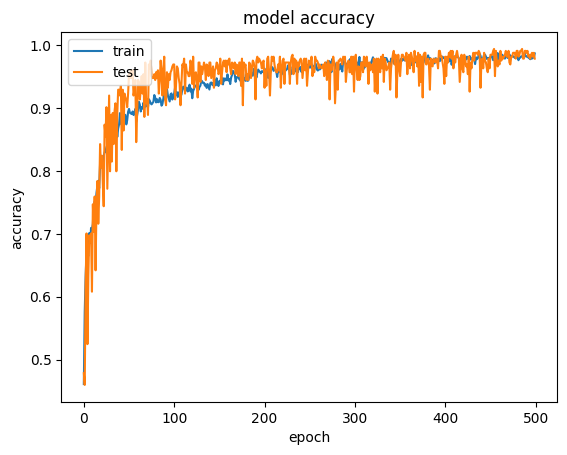

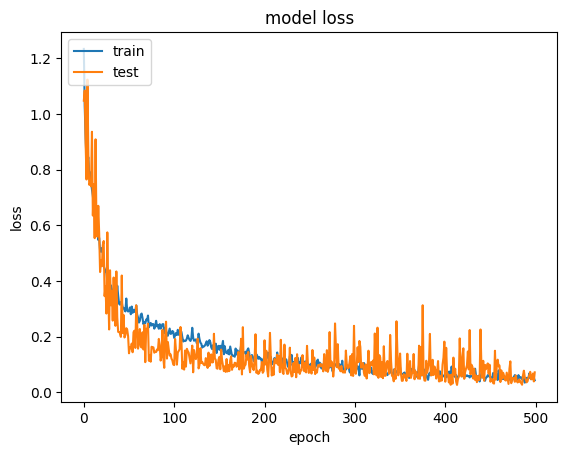

In [13]:
# Visualize the training and validation performance of the model over each epoch

# for history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# for history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
# Training and Validation loss and accuracy values at each epoch during the training process

history.history

{'loss': [1.2329809665679932,
  1.0268583297729492,
  0.9124389886856079,
  0.8269555568695068,
  0.8272146582603455,
  0.8441393971443176,
  0.778910219669342,
  0.7904230952262878,
  0.7557861804962158,
  0.7280676364898682,
  0.705233097076416,
  0.6705162525177002,
  0.6377814412117004,
  0.6393592953681946,
  0.609719455242157,
  0.5756886601448059,
  0.5473867654800415,
  0.5550572872161865,
  0.5082737803459167,
  0.5049138069152832,
  0.5187864303588867,
  0.5041235089302063,
  0.4531130790710449,
  0.44395044445991516,
  0.4355292320251465,
  0.42826297879219055,
  0.39844587445259094,
  0.4324091076850891,
  0.3865320384502411,
  0.3789922297000885,
  0.3843548595905304,
  0.36934274435043335,
  0.3621805012226105,
  0.36052581667900085,
  0.3992574214935303,
  0.36136046051979065,
  0.33571964502334595,
  0.3832816779613495,
  0.3485620617866516,
  0.3182556927204132,
  0.3150724768638611,
  0.3248263895511627,
  0.3241300582885742,
  0.3021433651447296,
  0.3039806783199310